In [91]:
import json
import pandas as pd

def read_json_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            json_obj = json.loads(line)
            data.append(json_obj)
    return data

In [92]:
json_path = "/cluster/scratch/mullec/FoRL/FRL23-project/dreamerv3/logdir/cartpole_default_settings/metrics.jsonl"

metrics = read_json_file(json_path)

metrics_df = pd.json_normalize(metrics)

# Print the DataFrame
for col in metrics_df.columns:
    print(col)

step
episode/length
episode/score
episode/reward_rate
train/action_mag
train/action_max
train/action_mean
train/action_min
train/action_std
train/actor_opt_actor_opt_grad_overflow
train/actor_opt_actor_opt_grad_scale
train/actor_opt_grad_norm
train/actor_opt_grad_steps
train/actor_opt_loss
train/adv_mag
train/adv_max
train/adv_mean
train/adv_min
train/adv_std
train/cont_avg
train/cont_loss_mean
train/cont_loss_std
train/cont_neg_acc
train/cont_neg_loss
train/cont_pos_acc
train/cont_pos_loss
train/cont_pred
train/cont_rate
train/dyn_loss_mean
train/dyn_loss_std
train/extr_critic_critic_opt_critic_opt_grad_overflow
train/extr_critic_critic_opt_critic_opt_grad_scale
train/extr_critic_critic_opt_grad_norm
train/extr_critic_critic_opt_grad_steps
train/extr_critic_critic_opt_loss
train/extr_critic_mag
train/extr_critic_max
train/extr_critic_mean
train/extr_critic_min
train/extr_critic_std
train/extr_return_normed_mag
train/extr_return_normed_max
train/extr_return_normed_mean
train/extr_retur

In [93]:
episode_df = metrics_df[["episode/length", "episode/score", "episode/reward_rate"]]
episode_df.loc[:, "episode/scaled_score"] = episode_df["episode/score"] - episode_df["episode/length"] * cost_per_observation
episode_df['step'] = episode_df['episode/length'].cumsum().shift(fill_value=0)

/tmp/ipykernel_23717/766913412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episode_df.loc[:, "episode/scaled_score"] = episode_df["episode/score"] - episode_df["episode/length"] * cost_per_observation
/tmp/ipykernel_23717/766913412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episode_df['step'] = episode_df['episode/length'].cumsum().shift(fill_value=0)


/tmp/ipykernel_23717/3948331463.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episode_df_no_na['smoothed_scaled_score'] = episode_df_no_na['episode/scaled_score'].rolling(window=20, min_periods=1).mean()


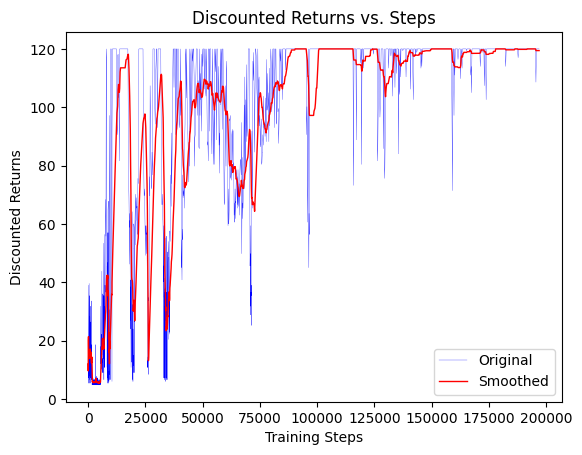

In [94]:
import matplotlib.pyplot as plt

episode_df_no_na = episode_df.dropna(how='any', subset=['episode/scaled_score', 'step'])

# Calculate the moving average using a window size of 10
episode_df_no_na['smoothed_scaled_score'] = episode_df_no_na['episode/scaled_score'].rolling(window=20, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(episode_df_no_na['step'], episode_df_no_na['episode/scaled_score'], marker='o', linestyle='-', color='b', linewidth=0.2, markersize=0)
plt.plot(episode_df_no_na['step'], episode_df_no_na['smoothed_scaled_score'], linestyle='-', color='r', linewidth=1)
plt.xlabel('Training Steps')
plt.ylabel('Discounted Returns')
plt.title('Discounted Returns vs. Steps')
plt.legend(['Original', 'Smoothed'])
plt.show()


/tmp/ipykernel_23717/982774895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episode_df_no_na['smoothed_score'] = episode_df_no_na['episode/score'].rolling(window=20, min_periods=1).mean()


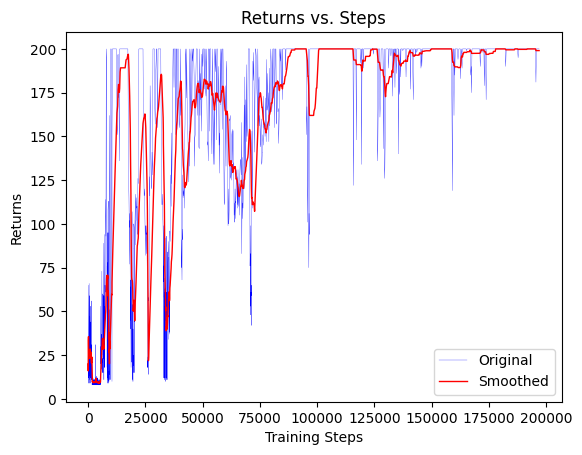

In [95]:
episode_df_no_na = episode_df.dropna(how='any', subset=['episode/score', 'step'])

# Calculate the moving average using a window size of 10
episode_df_no_na['smoothed_score'] = episode_df_no_na['episode/score'].rolling(window=20, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(episode_df_no_na['step'], episode_df_no_na['episode/score'], marker='o', linestyle='-', color='b', linewidth=0.2, markersize=0)
plt.plot(episode_df_no_na['step'], episode_df_no_na['smoothed_score'], linestyle='-', color='r', linewidth=1)
plt.xlabel('Training Steps')
plt.ylabel('Returns')
plt.title('Returns vs. Steps')
plt.legend(['Original', 'Smoothed'])
plt.show()

/tmp/ipykernel_23717/169501450.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df_no_na['smoothed_' + METRIC] = metrics_df_no_na[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


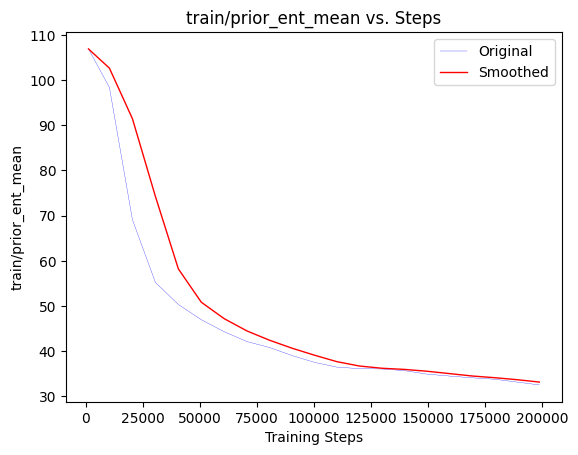

In [96]:
METRIC = "train/prior_ent_mean"
ROLLING_WINDOW = 3


metrics_df_no_na = metrics_df.dropna(how='any', subset=[METRIC, 'step'])

# Calculate the moving average using a window size of 10
metrics_df_no_na['smoothed_' + METRIC] = metrics_df_no_na[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(metrics_df_no_na['step'], metrics_df_no_na[METRIC], marker='o', linestyle='-', color='b', linewidth=0.2, markersize=0)
plt.plot(metrics_df_no_na['step'], metrics_df_no_na['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1)
plt.xlabel('Training Steps')
plt.ylabel(METRIC)
plt.title(METRIC + " vs. Steps")
plt.legend(['Original', 'Smoothed'])
plt.show()